In [10]:
import eurostat
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5, 
            'figure.constrained_layout.use':True}
plt.rcParams.update(settings)

%config InlineBackend.figure_format = "retina"

In [12]:
#### Where to put data, figure
output = "../Data/"
figures = "../Figures/"	

### European Unemployment

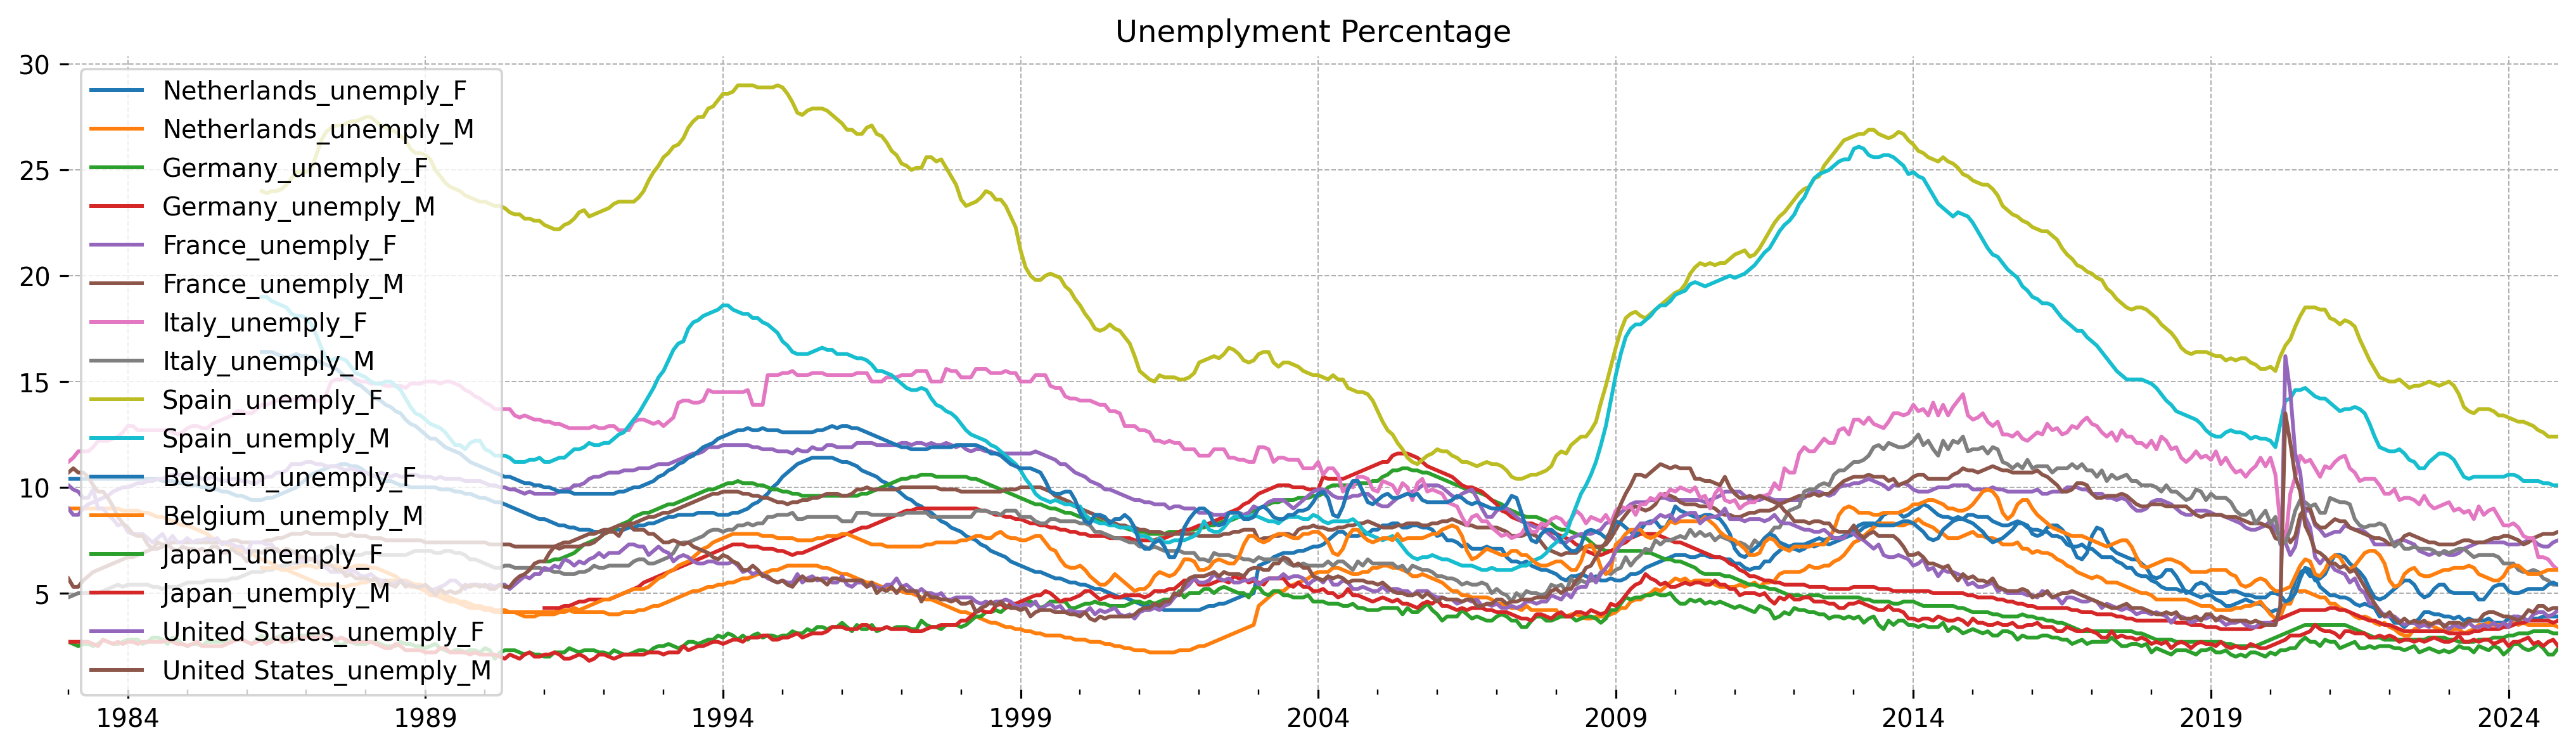

In [13]:
start_date = "1983-01-01"

data = eurostat.get_data_df('une_rt_m')   ###############


data = data[data['freq'] == 'M']
data = data[data['s_adj'] == 'SA']
data = data[data['age'] == 'TOTAL']
data = data[data['unit'] == 'PC_ACT']
data = data[data['sex'].isin(['M', 'F'])]

dt2 = data.iloc[:, 5:]
dt2 = dt2.T
# after transpose, first row is the column names
dt2.columns = dt2.iloc[0,:]
# remove first row
data1 = dt2.iloc[1:]

data1.index = pd.date_range(start = start_date,  periods = data1.shape[0], freq = "MS")
data1 = data1.loc[:, ['NL','DE','FR','IT','ES','BE','JP','US']]
data1.columns = ['Netherlands_unemply_F', 'Netherlands_unemply_M', 'Germany_unemply_F', 'Germany_unemply_M', 'France_unemply_F', 'France_unemply_M','Italy_unemply_F','Italy_unemply_M','Spain_unemply_F', 'Spain_unemply_M','Belgium_unemply_F','Belgium_unemply_M','Japan_unemply_F','Japan_unemply_M', 'United States_unemply_F','United States_unemply_M']
data1.plot(title='Unemplyment Percentage');
data1.to_csv(output + "unemployment_mo.csv")


### European GDP

<Axes: >

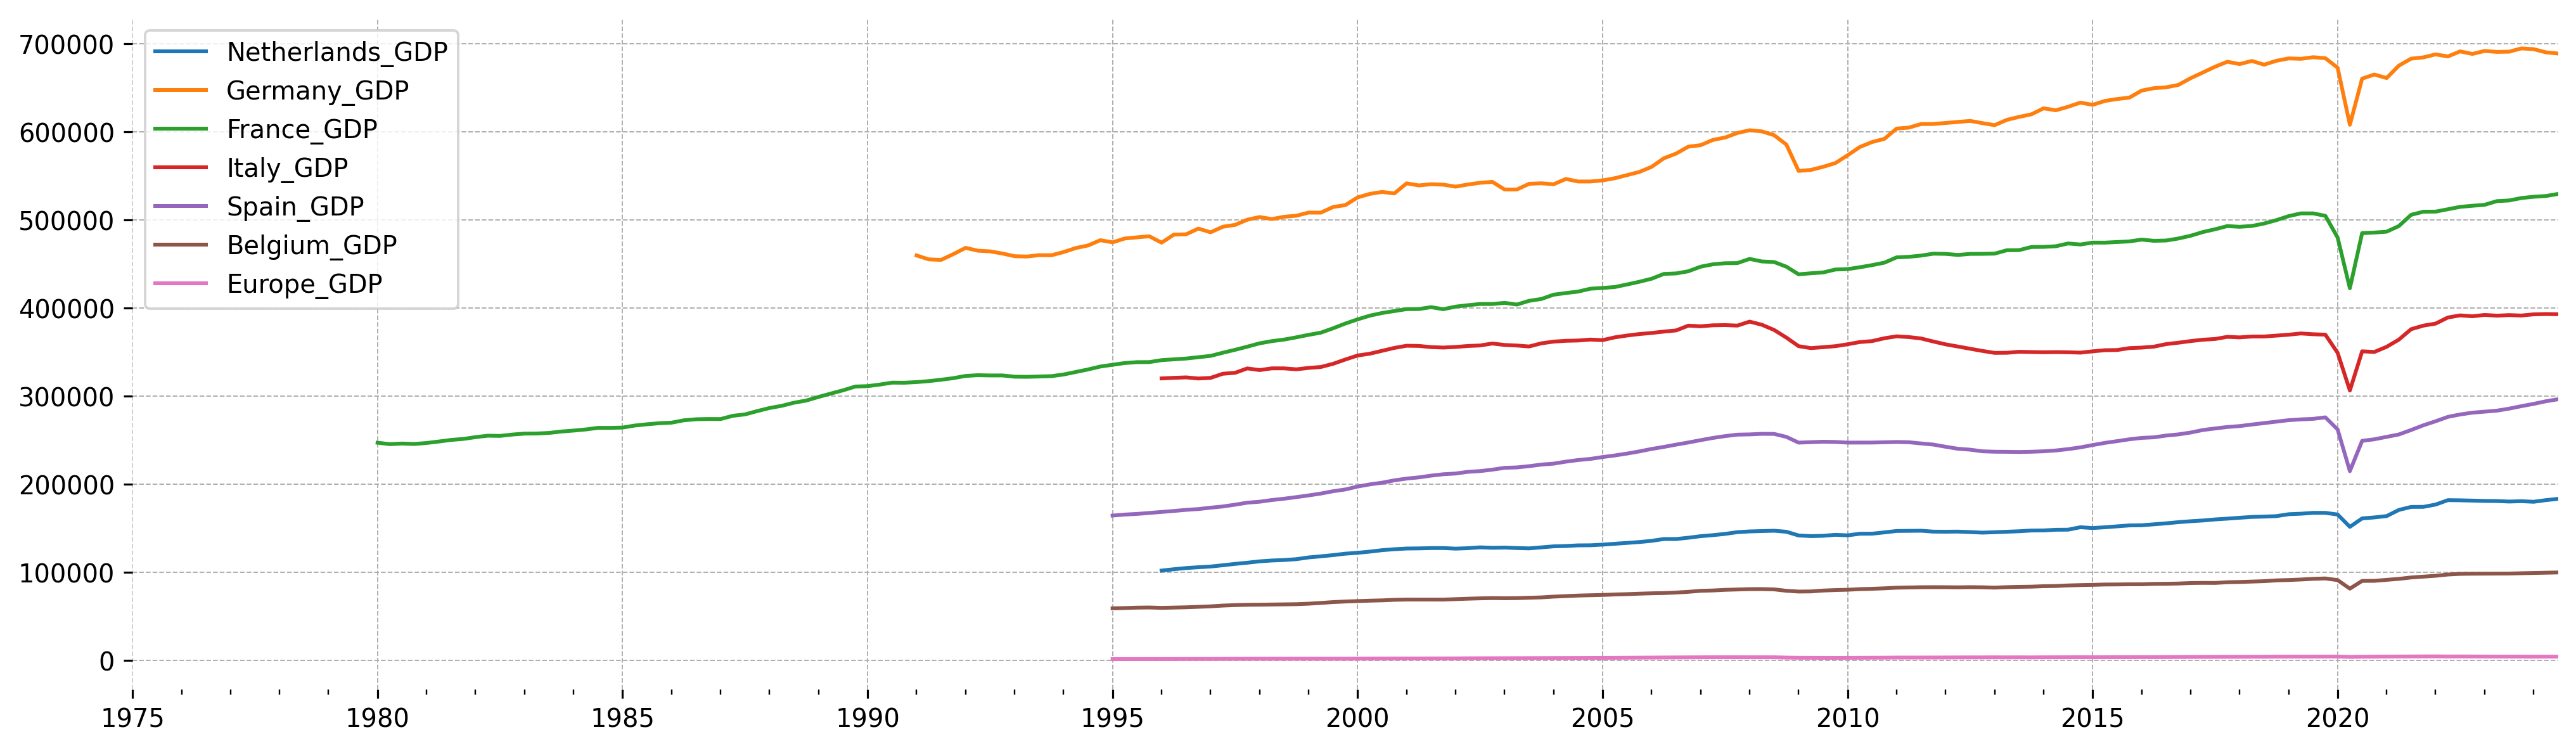

In [14]:
start_date = '01/01/1975'

data = eurostat.get_data_df('namq_10_gdp')
data = data[data["unit"] == "CLV10_MEUR"]
data = data[data["s_adj"] == "SCA"] #NSA
data = data[data['na_item'] == 'B1G']

##################
# select needed items for analysis
##################

dt2 = data.iloc[:, 4:]
dt2 = dt2.T
# after transpose, first row is the column names
dt2.columns = dt2.iloc[0,:]
# remove first row
data1 = dt2.iloc[1:]
data1.index = pd.date_range(start = start_date,  periods = data1.shape[0], freq = "QS")
data1 = data1.loc[:, ['NL','DE','FR','IT','ES','BE','EE']]
data1.columns = ['Netherlands_GDP', 'Germany_GDP', 'France_GDP', 'Italy_GDP', 'Spain_GDP', 'Belgium_GDP','Europe_GDP']

data1.to_csv(output + "europe_gdp_qt.csv")
data1.plot()